Importer les données situées à l'adresse suivante:   
https://raw.githubusercontent.com/briatte/aad/master/reinhart-rogoff/debt.csv

Morgan / Daphné / Eryck / Hélène

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/briatte/aad/master/reinhart-rogoff/debt.csv', sep = ',')
data.head(2)

,Unnamed: 0,Country,Year,growth,ratio
0,147,Australia,1946,-3.557951,190.419080
1,148,Australia,1947,2.459475,177.321371


Faire les vérifications d'usage (taille des données, nombre de valeurs manquantes, type des variables)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1171 non-null   int64  
 1   Country     1171 non-null   object 
 2   Year        1171 non-null   int64  
 3   growth      1171 non-null   float64
 4   ratio       1171 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 45.9+ KB


Faire une représentation graphique de la croissance en fonction du ratio dette/PIB.

In [0]:
#sns.catplot("growth", "ratio", data=data)

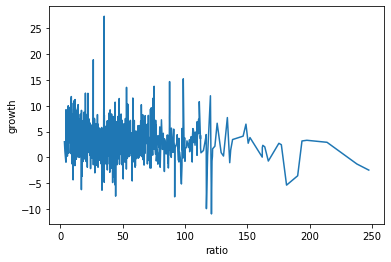

In [0]:
sns.lineplot("ratio", "growth", data=data)

Choisir 5 pays, faire un scattter plot qui représente la croissance en fonction du ratio et colorer les points par pays.

In [0]:
data['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Japan',
       'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Spain',
       'Sweden', 'UK', 'US'], dtype=object)

In [0]:
'Australia', 'France', 'US', 'Italy', 'Norway'

('Australia', 'France', 'US', 'Italy', 'Norway')

In [0]:
df = data[data['Country'].isin(['Australia', 'France', 'US', 'Italy', 'Norway'])]
df


,Unnamed: 0,Country,Year,growth,ratio
0,147,Australia,1946,-3.557951,190.419080
1,148,Australia,1947,2.459475,177.321371
2,149,Australia,1948,6.437534,148.929811
3,150,Australia,1949,6.611994,125.828699
4,151,Australia,1950,6.920201,109.809398
...,...,...,...,...,...
1166,3296,US,2005,3.054518,62.766724
1167,3297,US,2006,2.672807,63.489973
1168,3298,US,2007,2.141613,63.985488
1169,3299,US,2008,0.438166,74.091061


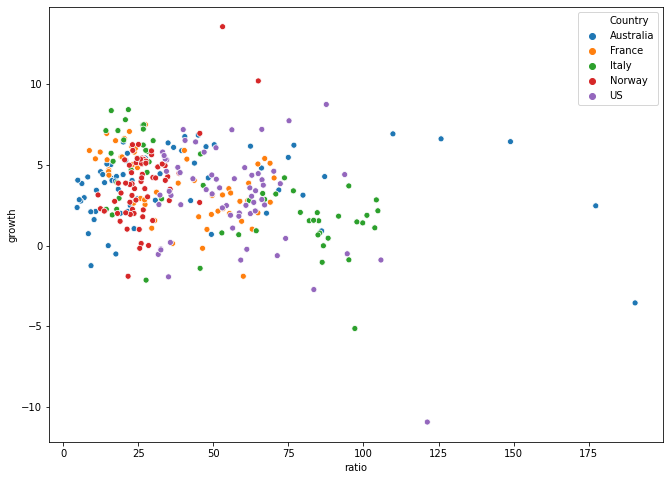

In [0]:
fig = plt.figure(figsize = (11,8))
sns.scatterplot(df["ratio"], df["growth"], hue = df['Country'])

plt.show()

Réaliser un box plot de la croissance pour ces 5 pays.

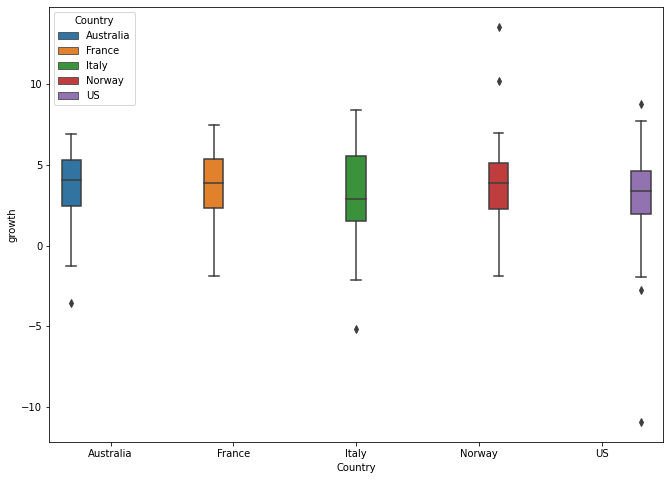

In [0]:
fig = plt.figure(figsize = (11,8))
sns.boxplot(df["Country"], df["growth"], hue=df["Country"])
plt.show()


A l'aide numpy réaliser une régression linéaire avec la croissance en y (variable expliquée) et le ratio en x (variable explicative).   
Représenter la droite de régression sur le graphique.

In [0]:
import numpy as np

x= df["ratio"]
y= df["growth"]
regression = np.polyfit(x,y, deg=1)
regression

array([-9.11092074e-08,  3.45786618e-05, -4.27230507e-03,  1.69638216e-01,
        2.07671497e+00])

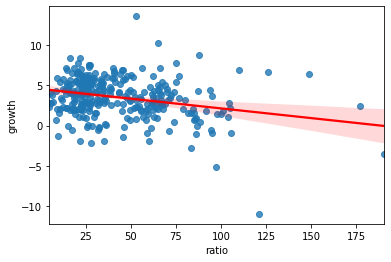

In [0]:
sns.regplot(df["ratio"], y= df["growth"], line_kws={'color' : 'red'})

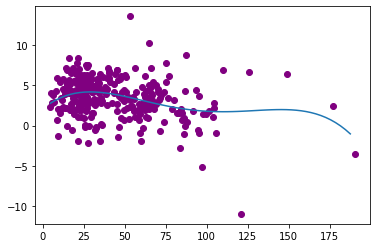

In [0]:
array = np.arange(df["ratio"].min(), df["ratio"].max(),3)
plt.scatter(df["ratio"],y= df["growth"], c='purple')
plt.plot(array, np.poly1d(regression)(array))

*à regarder après le dojo*    
Si vous voulez en savoir plus allez-voir ici: https://youtu.be/yeX_Zs7zztY